In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/dimitri/bin/")
import extractor
from IPython.display import HTML

In [2]:
# %load /home/dimitri/bin/jupyter_hide_code.txt
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


# Données

In [3]:
datafile = sqlite3.connect("data.sqlite")
data = extractor.get_partdata(datafile, "partie_PublicGoodGame_repetitions")
data.head()

,session,joueur,id,partie_partie_id,PGG_period,PGG_treatment,PGG_group,PGG_indiv,PGG_public,PGG_publicgroup,PGG_decisiontime,PGG_indivpayoff,PGG_publicpayoff,PGG_periodpayoff,PGG_cumulativepayoff
0,201802010856,201802010856_j_13,3,41,1,0,201802010856_g_4,11,9,45,7,11,22.5,33.5,33.5
1,201802010856,201802010856_j_13,23,41,2,0,201802010856_g_4,20,0,24,7,20,12.0,32.0,65.5
2,201802010856,201802010856_j_13,43,41,3,0,201802010856_g_4,1,19,58,7,1,29.0,30.0,95.5
3,201802010856,201802010856_j_13,63,41,4,0,201802010856_g_4,12,8,26,7,12,13.0,25.0,120.5
4,201802010856,201802010856_j_13,83,41,5,0,201802010856_g_4,0,20,49,7,0,24.5,24.5,145.0


## groupby

In [4]:
data_periods = data.groupby(data.PGG_period)
data_groups = data.groupby(data.PGG_group)
data_groups_periods = data.groupby([data.PGG_group, data.PGG_period])

In [5]:
groups = np.unique(data.PGG_group)

<hr style="border-color: brown; height:1.2px;" />

## Contribution moyenne

In [6]:
data_groups_averages = pd.DataFrame(data_groups.PGG_publicgroup.mean())
data_groups_averages

,PGG_publicgroup
PGG_group,
201802010856_g_0,41.4
201802010856_g_1,42.0
201802010856_g_2,39.8
201802010856_g_3,38.7
201802010856_g_4,38.7


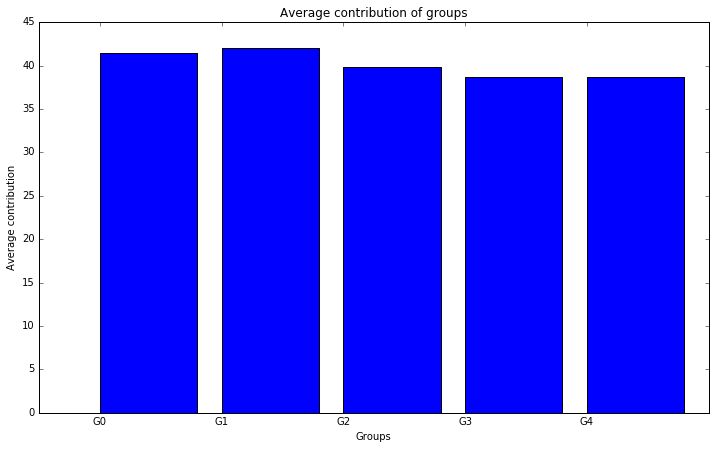

In [7]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
graph.bar(range(1, len(groups)+1), data_groups_averages.PGG_publicgroup)
graph.set_xlim(0.5, len(groups)+1)
graph.set_xticks(range(1, len(groups)+1))
graph.set_xticklabels(["G{}".format(i) for i in range(len(groups))])
graph.set_xlabel("Groups")
graph.set_ylabel("Average contribution")
graph.set_title("Average contribution of groups");

## Evolution de la contribution moyenne

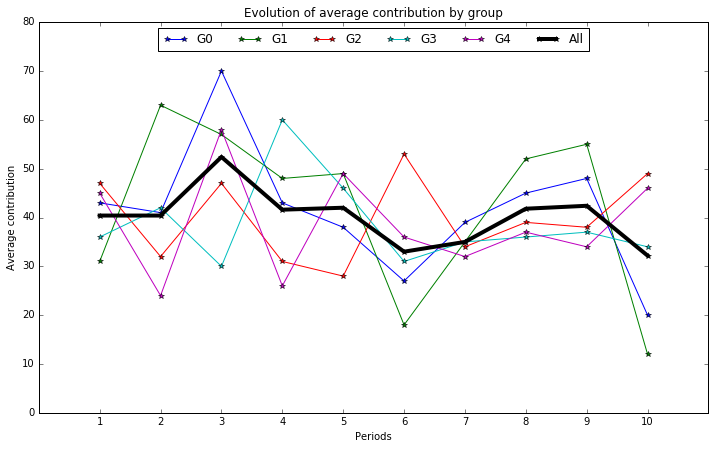

In [8]:
fig = plt.figure(figsize=(12, 7))

graph = fig.add_subplot(111)
for g in np.unique(data.PGG_group):
    graph.plot(range(1, 11), data_groups_periods.PGG_publicgroup.mean().loc[g], 
               label="G{}".format(g.split("_")[2]), marker="*")
graph.plot(range(1, 11), data_periods.PGG_publicgroup.mean(), "-*k", label="All", lw=4)

graph.set_xlim(0, 11)
graph.set_xticks(range(1, 11))
graph.set_xlabel("Periods")
graph.set_ylabel("Average contribution")
graph.set_ylim(0, 80)
graph.set_yticks(range(0, 81, 10))
graph.legend(loc="upper center", ncol=len(groups)+1)
graph.set_title("Evolution of average contribution by group");

## Fréquence de chaque contribution individuelle

In [9]:
data_frequencies = data.PGG_public.value_counts(normalize=True).reindex(range(0, 21))

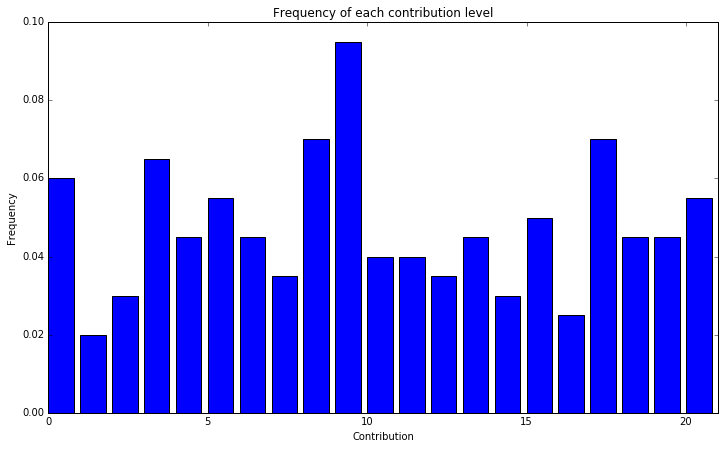

In [10]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
graph.bar(range(21), data_frequencies)
graph.set_xlim(0, 21)
graph.set_xlabel("Contribution")
graph.set_ylabel("Frequency")
graph.set_title("Frequency of each contribution level");

### Par groupe

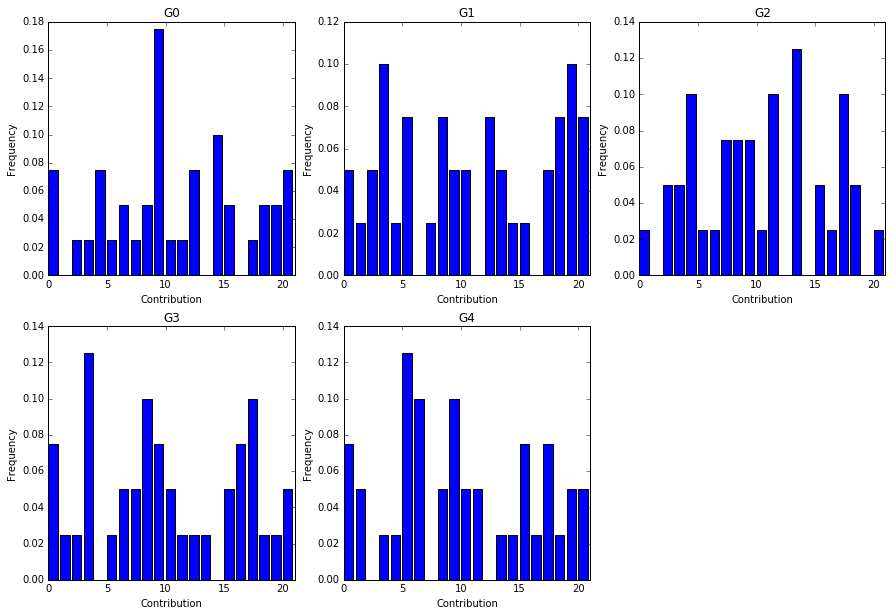

In [11]:
num_row = int(len(np.unique(data.PGG_group)) / 3) + int(len(np.unique(data.PGG_group))%3 > 0)
fig = plt.figure(figsize=(15, num_row * 5))

for i, g in enumerate(np.unique(data.PGG_group)):
    graph = fig.add_subplot(num_row, 3, i+1)
    tmp = data.loc[data.PGG_group == g, "PGG_public"]
    tmp2 = tmp.value_counts(normalize=True).reindex(range(21))
    graph.bar(range(21), tmp2)
    graph.set_xlim(0, 21)
    graph.set_xlabel("Contribution")
    graph.set_ylabel("Frequency")
    graph.set_title("G{}".format(g.split("_")[2]))